# Agrupamiento basado en densidad

Pase de mensajes:  
- Responsabilidad (R): evidencia de que xk es el centroide más apropiado para xi

- Disponibilidad (A): evidencia de lo apropiado que xi escoja xk como su centroide habiendo sido elegido como centroide por otros puntos

>Note: Responsabilidad es el mensaje que mandamos para notificar a aquellos que consideramos que pueden ser centroides. Disponiblidad son aquellos que envían mensajes a los puntos diciendo que son los mejores candidatos para ser centroides.

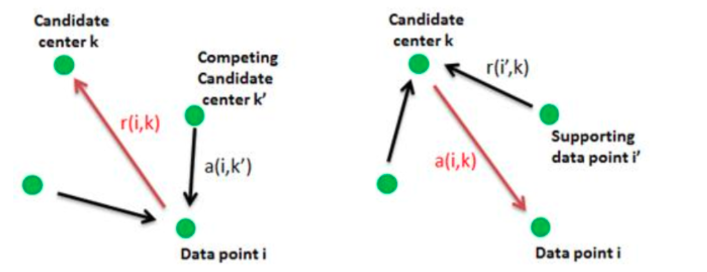


### Iniciliazación

- Matriz de similitud (S): Similitud entre todos los pares de ejemplos del conjunto de datos

- Preferencias: creencia (autoconfianza) de que un ejemplo xk puede ser centroide

Se modifica la matriz de similitud S para incorporar en su diagonal principal los valores de preferencia de cada ejemplo.


#### Asignación a clúster (Representantes)

Aquel representante que tiene una mayor responsabilidad y disponibilidad hacia el que tenemos asignado.

# Métodos de clustering probabilísticos

El uso de técnicas de agrupamiento basadas en modelos probabilísticos ha dado históricamente resultados prometedores. En este caso, se asume la existencia de un modelo probabilístico a partir del cual se han generado los datos observados.

Un algoritmo de agrupamiento de este tipo intenta encontrar, a partir de un conjunto de datos de entrenamiento (datos observados), el mejor ajuste del modelo generador que se esté asumiendo.

De esta manera, las técnicas de agrupamiento de este tipo se podrían definir como un procedimiento de estimación de los parámetros del modelo que se asume. La aproximación más común es asumir que el modelo probabilístico generador de los datos es una mixtura de distribuciones de probabilidad (normalmente, una mixtura gaussiana).

Cada componente (distribución) de la mixtura representaría un clúster y, de esta manera, se pueden separar los ejemplos del conjunto de entrenamiento en clústeres. Diremos que un ejemplo pertenece al clúster cuya componente le otorga mayor probabilidad.

De hecho, las técnicas probabilísticas de agrupamiento permiten considerar pertenencias probabilísticas (no deterministas) de ejemplos a clústeres, es decir, un ejemplo podría pertenecer a la vez a diferentes clústeres con diferente probabilidad.


### Mixturas Gaussianas

En esta práctica vamos a ver cómo funciona el clustering probabilístico, en concreto, el basado en Mixtura de Modelos Gaussianos, que hace uso de modelos generativos para encontrar el mejor generador (compuesto por varias componentes) para los datos de los que disponemos y, de esa manera, ser capaces de separarlos.

Función que asigna, a cada valor posible `x` de la variable `X`, la probabilidad de que se obtenga dicho valor.
La probabilidad de cada valor se obtiene usando una serie de variables aleatorias (una de selección, y varias componentes).

En este algoritmo vamos a tratar de generar una mixtura de gausseanas, que cada gausseana nos dará un clúster, y mediante una probabilidad podemos establecer si un punto pertenece a un clúster. Cuanto mayor su probabilidad, mayor sus chances de pertenecer a un clúster.

#### Que deseamos hacer?

- Plantear un modelo generador y entenderlo
- Estimar los parámetros del modelo generador dados los datos observados


Vamos a recordar cómo funciona primero 
k-means, en qué se parece al GMM y por qué podemos considerar el GMM como una generalización más potente del k-means.

Empezamos, como siempre, con los imports necesarios:

In [ ]:
#!pip install sklearn

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Las debilidades del k-Means

Está claro que k-means es un algoritmo muy utilizado dentro del clustering, pero tiene sus debilidades.

Vamos a entenderlas mediante dos ejemplos.

Antes de nada, vamos a generar los datos para ambos ejemplos y a visualizarlos. Simplemente vamos a usar un dataset artificialmente generado con 2 centros, y luego vamos a "estirar" dicho dataset:

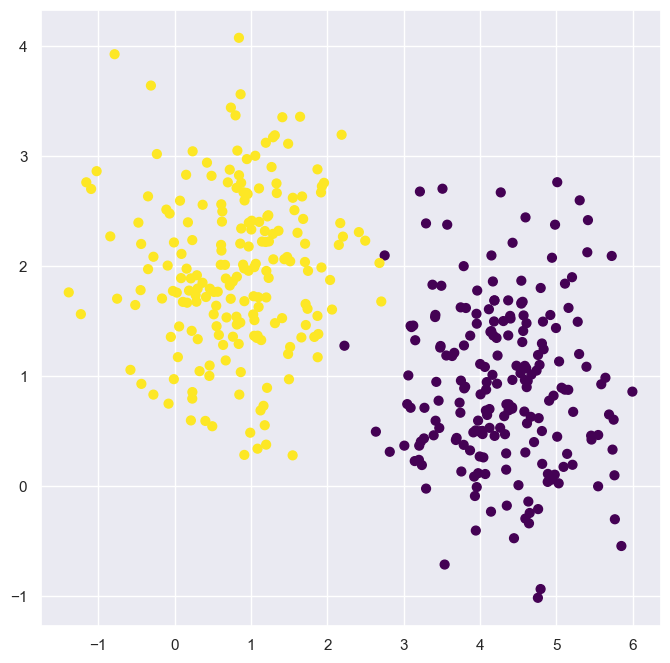

In [58]:
# generamos nuestro dataset original
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=2,
                       cluster_std=0.75, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
# mostramos los datos originales
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis');

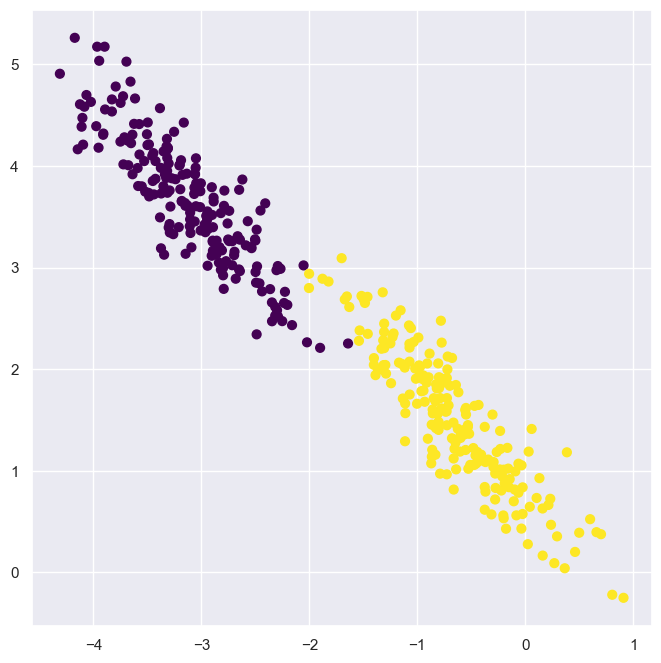

In [59]:
# estiramos los datos
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
# mostramos los datos
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_true, s=40, cmap='viridis');

Ahora vamos a aplicar el mismo K-means exactamente sobre cada uno de ellos y observar los resultados.

In [60]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None, title=''):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

    ax.scatter(centers[:, 0], centers[:, 1], marker='*', c='w', s=300, zorder=3)
    ax.set_title(title)

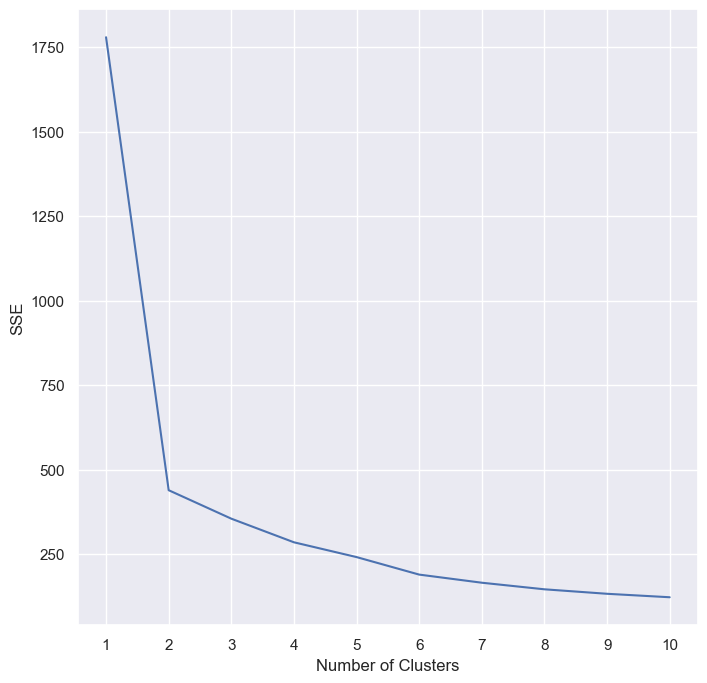

In [61]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

# Estimamos K para X
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

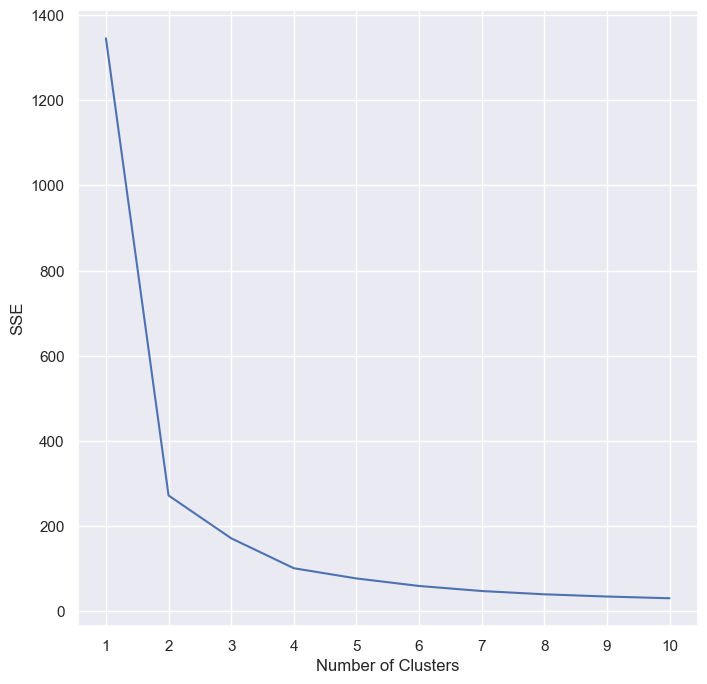

In [62]:
# Estimamos K para X_streatched
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_stretched)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

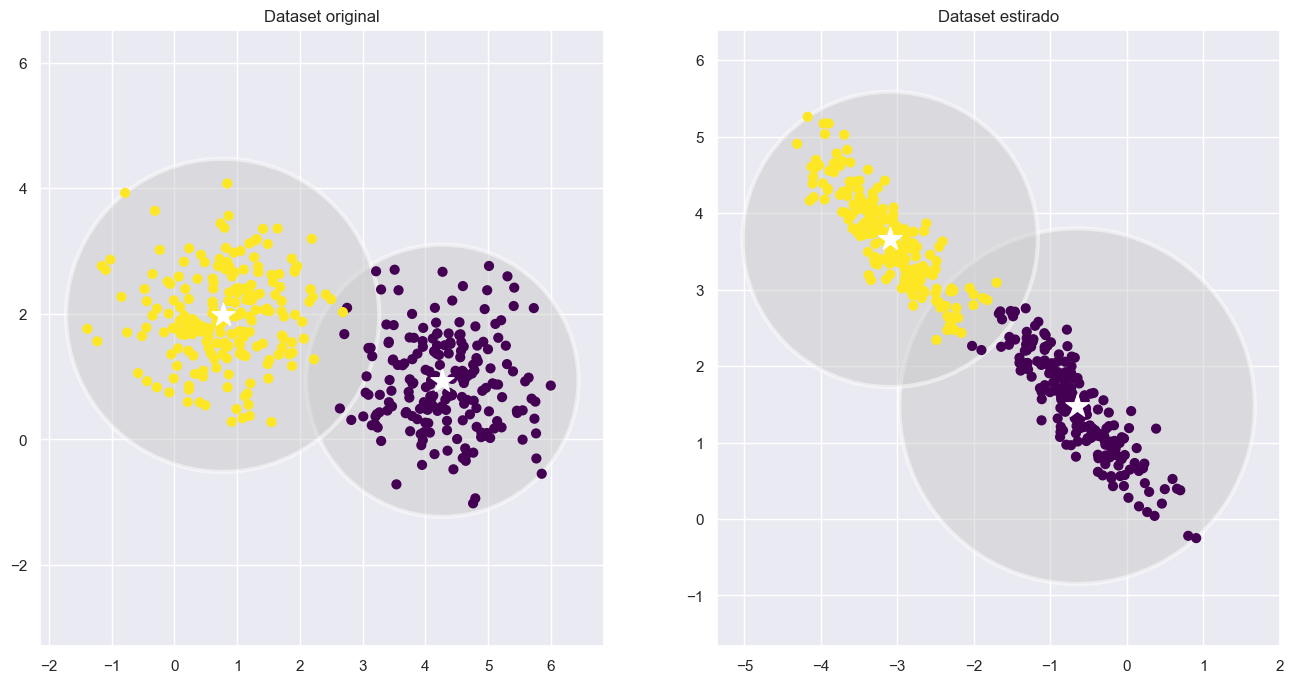

In [64]:
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots(1,2)

kmeans = KMeans(n_clusters=2, max_iter = 1)
plot_kmeans(kmeans, X, ax=ax[0], title='Dataset original')

kmeans = KMeans(n_clusters=2, max_iter = 1)
plot_kmeans(kmeans, X_stretched, ax=ax[1], title='Dataset estirado')
plt.rcParams['figure.figsize'] = [8, 8]

Podemos observar varios problemas a simple vista:

- K-means utilizar círculos (o en dimensions superiores, esferas o hiper-esferas) para delimitar los clusters, lo que muchas veces no se ajusta a la distribución real de nuestros datos. Esto es debido a la asunción de **independencia** entre las variables que usamos para clusterizar (covarianza es 0). Realmente el tamaño del cluster no es el círculo blanco, sino el punto medio entre centroides.

- K-means no permite decidir el tamaño de estos círculos (hiper-esferas), este tamaño viene dado por la posición de los centroides de cada cluster. Con lo cual, en caso de tener clusters de tamaño dispar, kmeans no va a poder clasificarlos correctamente.

- k-means realiza asignaciones deterministas (hard-classification) de las muestras a los clusters, incluso cuando no está claro si pertenecen a uno u otro. Parece útil que si un elemento está entre dos clusters, en vez de asignarlo a uno u a otro, le asignemos un 50% de probabilidad de pertenecer a cada uno.

Estas limitaciones parecen bastante restrictivas, ¿verdad? ¿Y si encontraramos una generalización del k-means que solucionara estos problemas?

Los modelos de mezcla de gaussianas solucionan estos problemas!



## Generalizando el algoritmo de k-means (Expectation–Maximitation): Gaussian Mixture Models

Como ya sabemos, un modelo de mezcla de Gaussianas trata de encontrar una mezcla de distribuciones de probabilidad Gaussianas multidimensionales que sean capaces de **generar** los datos con los que tratamos.

En el caso más sencillo, los GMMs pueden encontrar los clusters de la misma forma que k-means:

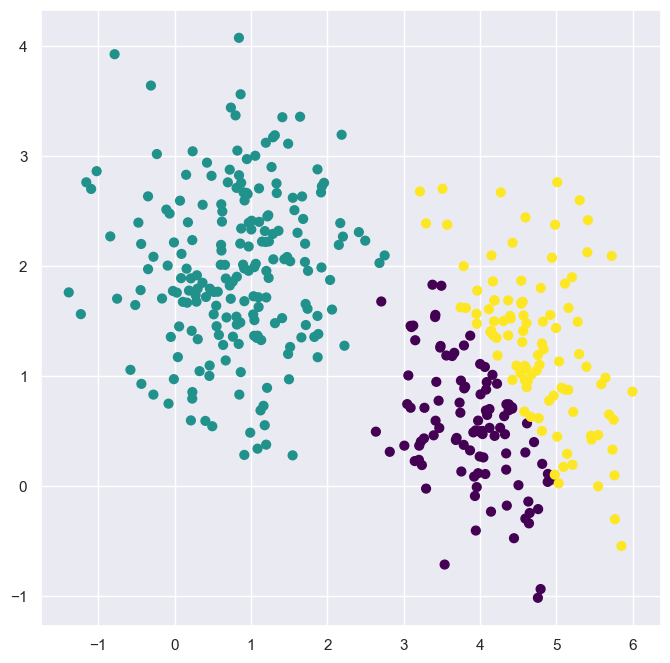

In [65]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

GMM es un modelo probabilístico, no solo podemos encontrar a qué cluster pertenece cada muestra, sino también con qué probabilidad.

Esto lo podemos hacer usando la función ``predict_proba``, que devuelve una matriz de tamaño ``[n_samples, n_clusters]`` que mide la probabilidad de cada punto de pertenecer a cada cluster:

In [66]:
probs = gmm.predict_proba(X)
print(probs[40:50].round(3))

[[0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.668 0.    0.332]
 [0.163 0.    0.837]
 [0.699 0.    0.301]
 [0.006 0.994 0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.854 0.    0.146]]


Esta información es realmente útil. Si le asignamos un tamaño diferente a cada punto dependiendo de la certeza de su predicción, podemos visualizar gráficos como el siguiente, donde los puntos más pequeños son los que se encuentran entre dos clusters.

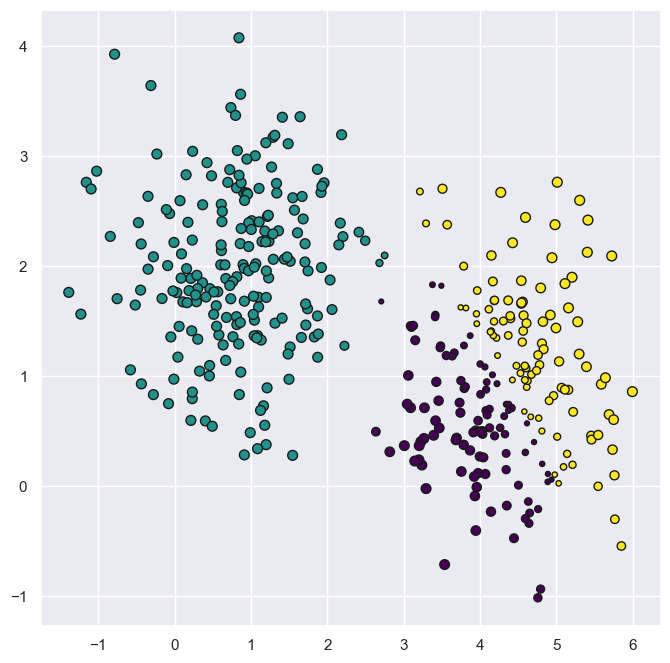

In [67]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size, edgecolor='k');



Al final GMM es tremendamente similar a k-means, usa el algoritmo de esperanza-maximización:

1. Escoge unas estimaciones iniciales para la posición ($\mu_k$) y la forma ($\sum_k$) de cada cluster (**componente**)

2. Después, repite hasta converger los siguientes pasos:

- *Paso E*: para cada elemento de nuestro dataset, encuentra unos pesos ($\hat{z}_{ik}$) codifican la pertenencia de elemento punto a cada componente de nuestro GMM

- *Paso M*: para cada cluster (**componente**), actualiza su posición, forma y tamaño, utilizando los pesos anteriores y todas las muestras del dataset para calcular $\hat{\pi}_k$, $\hat{\mu}_k$ y $\hat{\Sigma}_k$

Al final, cada elemento está asociado con las probabilidades de pertenecer a cada una de las componentes de nuestro GMM (**clusteres**).

Igual que en la versión del k-means, este algoritmo es sensible a la inicialización y puede no encontrar el máximo global, quedándose atrapado en un máximo local. Por ello, en la práctica utilizamos varias ejecuciones con distintas inicializaciones.

La siguiente función permite visualizar las elipses mostrando las curvas de nivel de las gaussianas en 2D:

In [68]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='*', c='w', s=300, zorder=3)

Vamos a usarla para visualizar el clustering anterior:

`covariance_type` controla los grados de libertad en la forma de cada grupo; es esencial configurar esto cuidadosamente para cualquier problema determinado. El valor predeterminado es covariance_type="diag".

GMM es capaz de dar solución a las limitaciones del k-means comentadas anteriormente.

Le hemos indicado un parámetro `covariance_type`. Este parámetro simplemente indica cómo va a ser la matriz de covarianzas. Puede tomar los siguientes valores:

- `spherical`: únicamente la diagonal principal de la matriz de covarianzas va a ser distinta de cero, y además todos los valores van a ser iguales
- `diag`: únicamente la diagonal principal de la matriz de covarianzas va a ser distinta de cero.
- `full`: sin restricciones en la matriz de covarianzas.


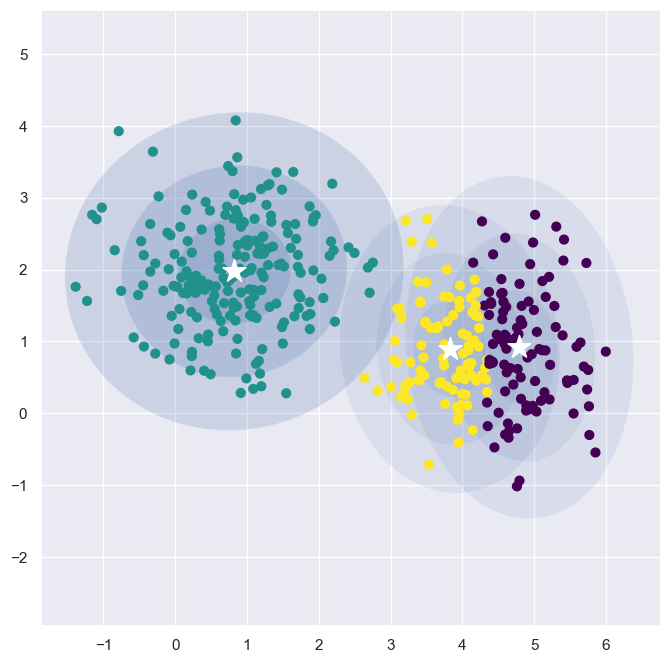

In [71]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X)

Hasta ahora solo hemos visto cómo se comporta con el dataset original, vamos a ver qué tal con el "estirado":

In [72]:
np.concatenate([X, X_stretched], 0).shape

(800, 2)

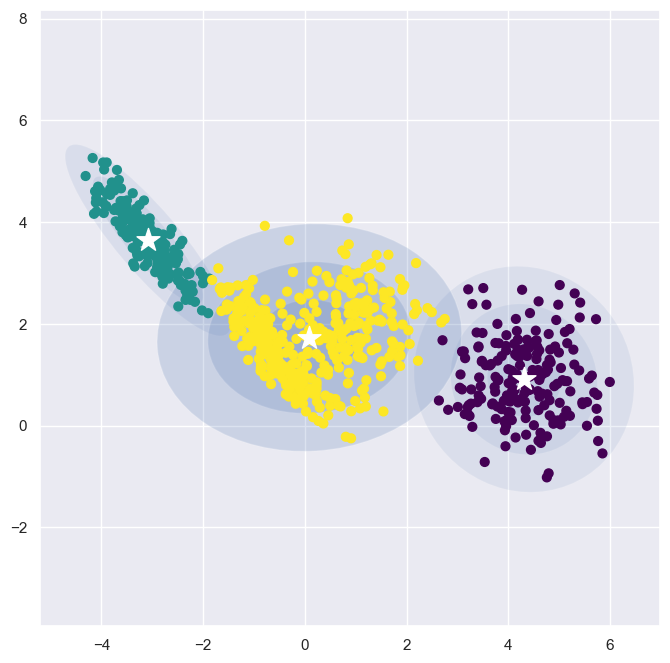

In [73]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, np.concatenate([X, X_stretched], 0))

## GMM como estimador de densidad

Aunque hayamos categorizado al GMM como un algoritmo de clustering, estamos hablando, fundamentalmente, de un algoritmo de estimación de densidad.

Es decir, estamos hablando de un modelo probabilístico generativo capaz de describir la distribución de los datos (y cuanto mejor la describa, mejor seremos capaces de agruparlos).

Por ejemplo, si tomamos como dataset el siguiente:

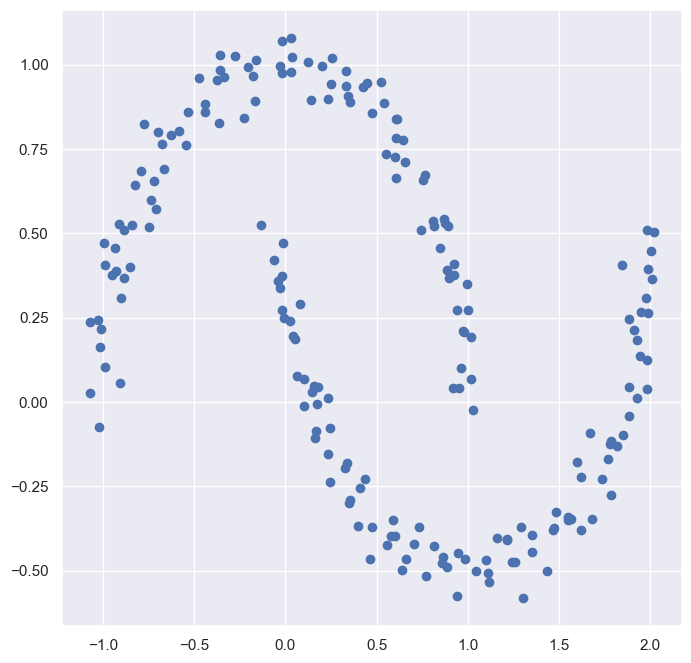

In [74]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

Podemos intentar encontrar un GMM capaz de **generar** los datos. Vamos a probar con 2 componentes:

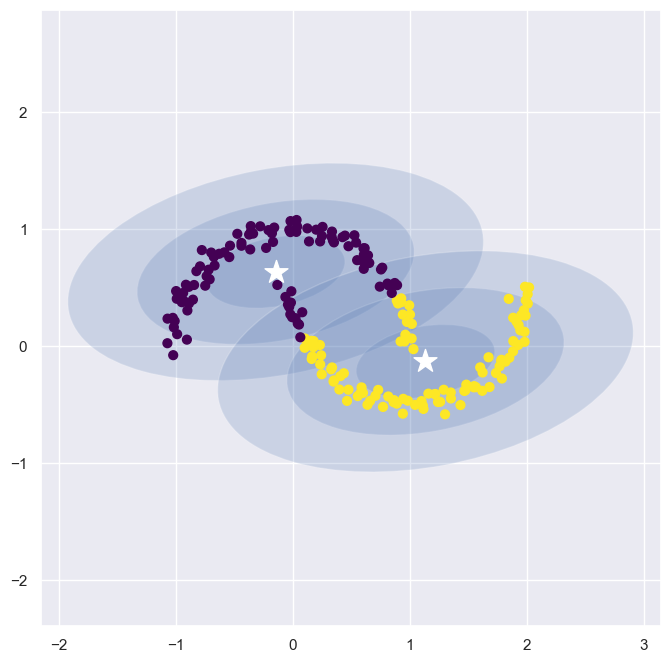

In [75]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

Claramente, no es suficiente. Vamos a ver con 10:

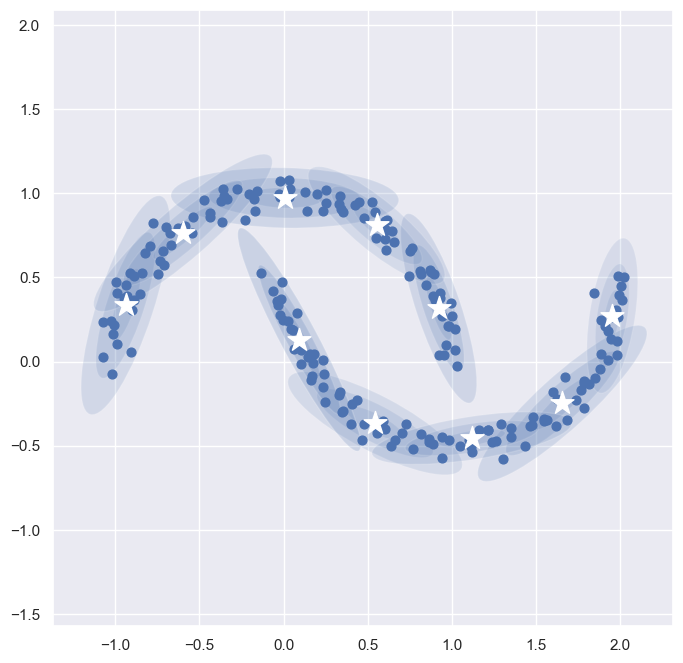

In [76]:
gmm10 = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
plot_gmm(gmm10, Xmoon, label=False)

Este GMM es capaz de **generar** perfectamente los datos que tenemos. Lo que está ocurriendo en este caso no es que estemos clusterizando los datos, sino que estamos modelando la **distribución** de los datos, y si quisieramos, podríamos generar más:

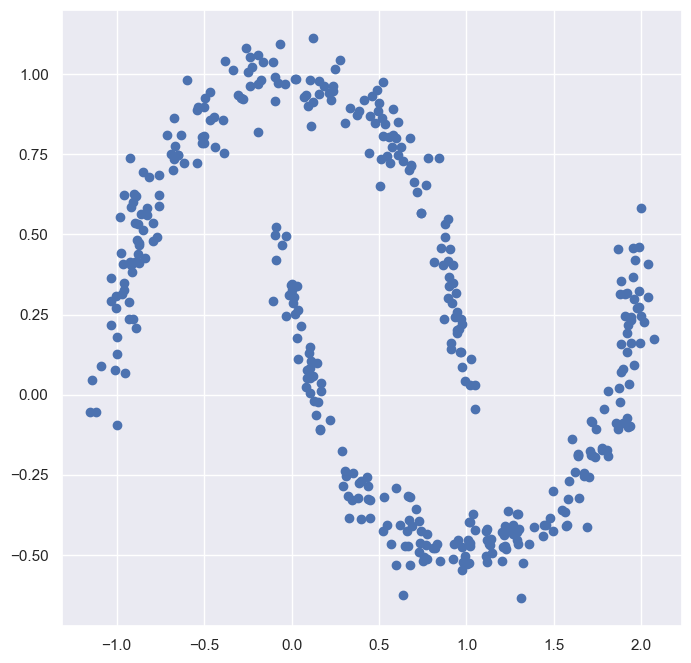

In [77]:
Xnew, y = gmm10.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])

GMM es capaz de modelar practicamente cualquier distribución de datos multi-dimensional.

### Cómo escogemos cuantas componentes?

El hecho de que GMM sea un modelo generativo nos brinda un medio natural para determinar el número óptimo de componentes para un conjunto de datos determinado. Un modelo generativo es inherentemente una distribución de probabilidad para el conjunto de datos, por lo que podemos simplemente evaluar la probabilidad de los datos bajo el modelo, utilizando validación cruzada para evitar un ajuste excesivo. Otra forma de corregir el sobreajuste es ajustar las probabilidades del modelo utilizando algún criterio analítico como el criterio de información de `Akaike (AIC)` o el criterio de información `bayesiano (BIC)`. El estimador GMM de Scikit-Learn en realidad incluye métodos integrados que calculan ambos, por lo que es muy fácil operar con este enfoque.

Veamos el `AIC` y el `BIC` como una función del número de componentes `GMM` para nuestro conjunto de datos lunar:

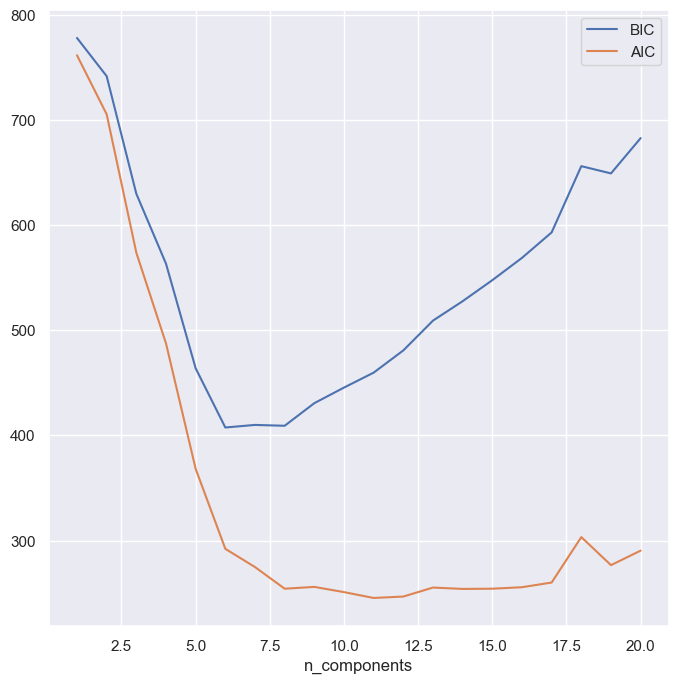

In [78]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

El número óptimo de clusters es el valor que minimiza el `AIC` o `BIC`, según la aproximación que queramos utilizar. El `AIC` nos dice que nuestra elección de componentes anteriores probablemente fue demasiada: entre `8` y `12` componentes habrían sido una mejor opción.
Como suele ocurrir con este tipo de problemas, el `BIC` recomienda un modelo más sencillo.

>Note:Observe el punto importante: esta elección del número de componentes mide qué tan bien funciona GMM **como estimador de densidad**, no qué tan bien funciona *como algoritmo de agrupamiento*.

## Ejemplo: Vamos a generar nuevos datos

Vamos a tratar de generar nuevos dígitos similares a los disponibles en el dataset `digits`:

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Veamos algunas imágenes:

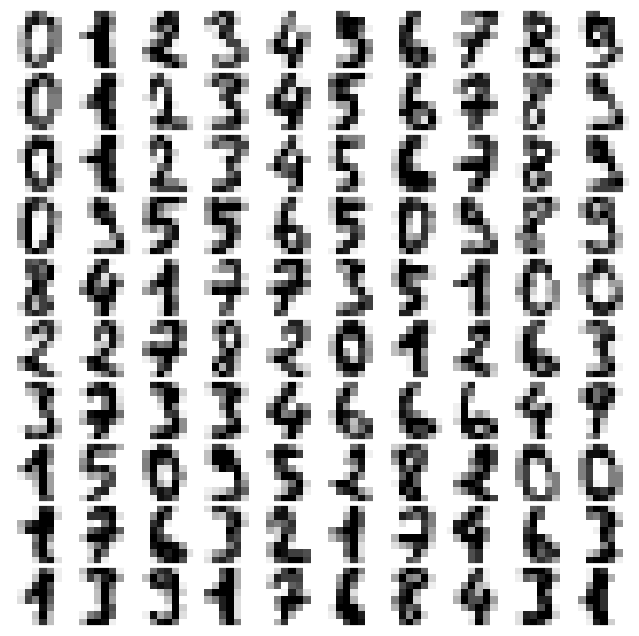

In [80]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

Tenemos 1800 dígitos de 8x8 píxels, es decir, 64 dimensiones. Vamos a ver cuantas componentes necesitamos para *modelar* nuestros datos 64-dimensionales:

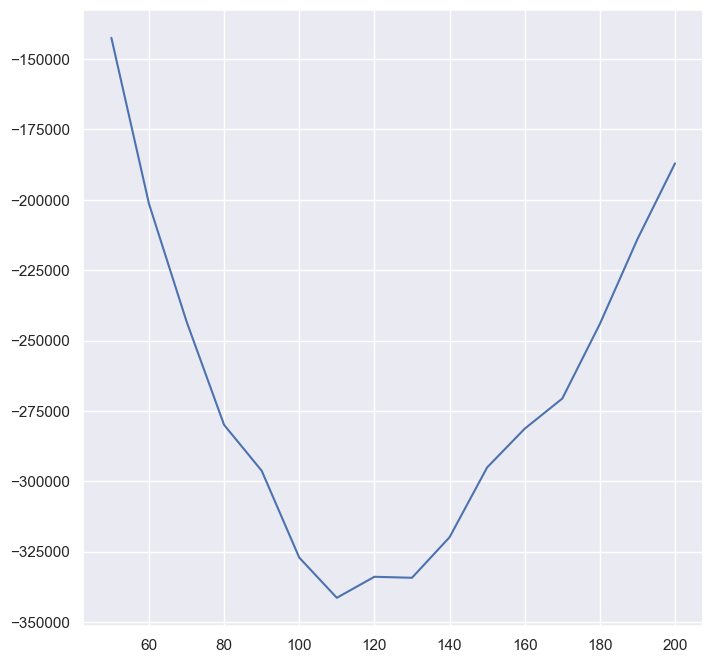

In [81]:
import numpy as np
from sklearn.mixture import GaussianMixture
n_components = np.arange(50, 210, 10) #Decidimos entre 50 y 210 para que nuestros datos queden representados
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(digits.data).aic(digits.data) for model in models] #Me permite ubicar el mejor parámetro
plt.plot(n_components, aics);

De acuerdo al AIC, parece que `n_componentes=110` es una buena estimación. Vamos a crear nuestro modelo GMM y ver si ha convergido:

In [ ]:
gmm = GaussianMixture(n_components=110, covariance_type='full', random_state=0)
gmm.fit(digits.data)
print(gmm.converged_)

Perfecto. Ahora podemos simplemente muestrear nuevos elementos de nuestra mixtura de gaussianas, y deberíamos obtener imágenes parecidas. Veamos si es verdad:

In [ ]:
data_new, y_new = gmm.sample(100)
data_new.shape

Vamos a visualizar nuestros nuevos datos:

In [ ]:
plot_digits(data_new)

¡Somos capaces efectivamente de generar nuevos datos como los que teníamos!

### Considera lo que hemos hecho aquí: 

Dada una muestra de dígitos escritos a mano, hemos modelado la distribución de esos datos de tal manera que podemos generar nuevas muestras de dígitos a partir de los datos: estos son **dígitos escritos a mano** que no aparecen en el conjunto de datos original, sino que capturan las características generales de los datos de entrada modelados por GMM. Un modelo generativo de dígitos de este tipo puede resultar muy útil como componente de un clasificador generativo bayesiano.

FUENTE: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html